In [1]:
# Get used to seeing these standard nicknames ('aliases'): almost everybody uses them!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

# The normal distribution

## Eyeballing the bell curve

The **normal distribution** or Gaussian distribution (named after a famous German mathematician from Göttingen) is ubiquitous in nature, and therefore also in statistics. You should think of it as a **pattern** or a theoretical ideal that fits many naturally occuring phenomena, i.e. you can use it to describe or "model" how certain groups of numbers behave, such as the height of life span of people. In our experience, it is slightly less common in the kind of cultural domains that we are concerned with in the Humanities, where other distributions (of the log-normal family) are very common. The fact that we pay so much attention to in this course has to do with the fact that some of the most well-known statistical **tests** crucially rely on it: to get an intuitive of how these tests work, you should have a solid intuition as to what a normal distribution is.

The easiest way to explain what a normal is, is to show one.

### Sidebar: Random Numbers

There are a lot of times in scientific research that you will need to generate random numbers. In particular, any time you perform a process that relies on some randomness, it is almost always a good idea to make sure the result is reproduceable, and the best way to do that is by **seeding** your random number generator.

Right now, the best way in Python to generate random numbers is using `numpy`, and in particular the (newer) `Generator` API, which is what we will be teaching you in this course.

In [2]:
rng = np.random.default_rng(seed=42)
numbers = rng.normal(size=100000)

In [3]:
numbers

array([ 0.30471708, -1.03998411,  0.7504512 , ...,  1.50317659,
       -0.15326604,  0.65459074])

In [ ]:
# OPTIONAL: Python has a lot of special methods that are marked with double underscores like
# __this__. One of the most useful for debugging problems is the __class__ method that tells us what
# kind of Python object we are dealing with.

print(f"{numbers.__class__} of shape {numbers.shape}")

Two Random Number Generators that are seeded the same will produce exactly the same output.

In [ ]:
rng2 = np.random.default_rng(seed=42)
numbers2 = rng2.normal(size=100000)

np.array_equal(numbers2, numbers)

Now, let's look at our data, using a histogram plot:

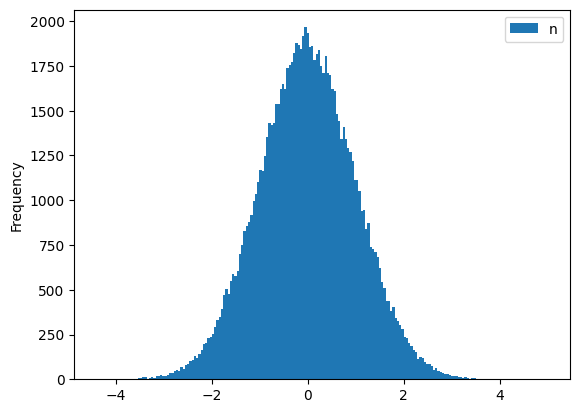

In [5]:
pd.DataFrame(numbers, columns=["n"]).plot.hist(bins=200)
plt.show()

In this graph, called a histogram, the x-axis shows us a range, that seems to be centered around zero. The vertical y-axis shows us the absolute frequency with which numbers occur in our vector for certain **bins** of values on the horizontal axis. To get normalized values for each bin (so that they sum to one), we can set `density=True` in the function call:

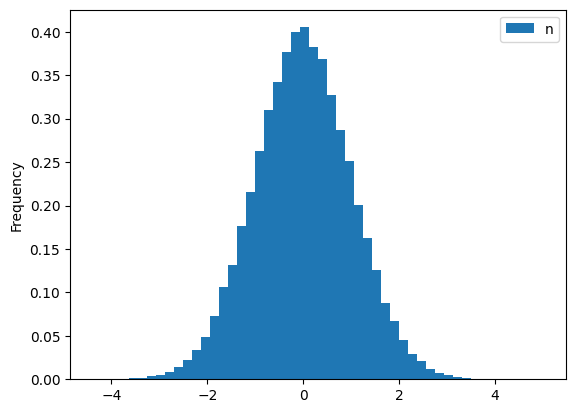

In [6]:
pd.DataFrame(numbers, columns=["n"]).plot.hist(bins=50, density=True)
plt.show()

Such plots are often overlaid with a **density curve** that shows a smooth trend line that tries to capture how the values are distributed in the data. You will immediately notice the well-known **bell-shape** of the resulting curve:

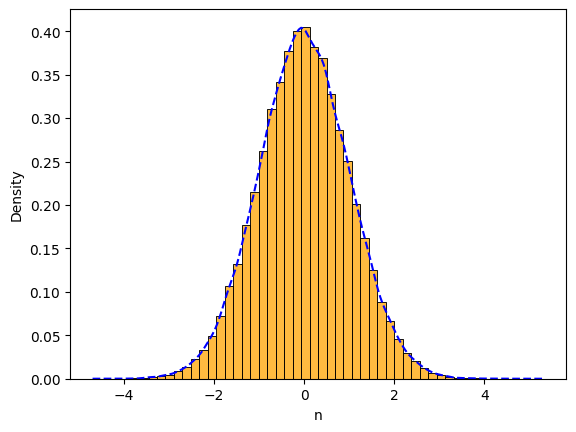

In [7]:
df = pd.DataFrame(numbers, columns=["n"])
sns.histplot(
    df,
    x="n",
    color="orange",
    stat="density",
    bins=50,
)
sns.kdeplot(df, x="n", color="blue", linestyle="--")
plt.show()

The density plot has a similar range on the x-axis as the histogram. The smoothed line indicates the relative proportion or density of the numbers across the range of values in `numbers`.

These plots provide an intuition as to which numbers are common in our values and which are less common -- there's an obvious **peak** of values around 0; to the far left and far right of the x-axis, we see that values become less common. Note that the shape of the curve is strongly **symmetric**: the pattern that we see to the left of the peak is almost perfectly mirrorred to the right of it. These are only trends and the symmetry isn't perfect -- that is because we work with a **sample**: the more numbers we would draw from our ideal distribution, the clearer these trends would emerge. Note that the total area under the density curve will be **sum to one**. (In mathematical terms, we say that the curve will integrate to one, from [$-\infty\to+\infty$] on the x-axis.)

This example illustrates what we understand by a **probability distribution** in statistics: it is *a theoretical model that describes how the probability mass is distributed over the possible values in a certain population* (or a sample of it). In this case, we have a **continuous** probability distribution, because the numbers on the horizontal axis are scalar (and not, for instance, categories, for which we would need a **discrete** probability function). If we sample from this population, the model helps us manage and make explicit our expectations as to the numbers that will be drawn.



#### Exercise

> The **sample size** (`n` above) influences how clear the emerging bell curve is. Draw some new samples for some random values for `n`, between 1 and 100000 (especially some really small values) and plot the corresponding histogram or density curve: from which sample size onwards do you see a bell shape emerge? You can do this by changing the `LIMIT` value. We have provided you with some extra code! As well as the smoothed density estimate (blue dashed line) we have given you code to draw the theoretical normal curve (the output of the standard-normal "probability density function") on top. In case you are wondering, because the `numbers` array is randomly drawn from a normal distribution, just taking the first $n$ values from our sample is more or less equivalent to sampling $n$ new values.

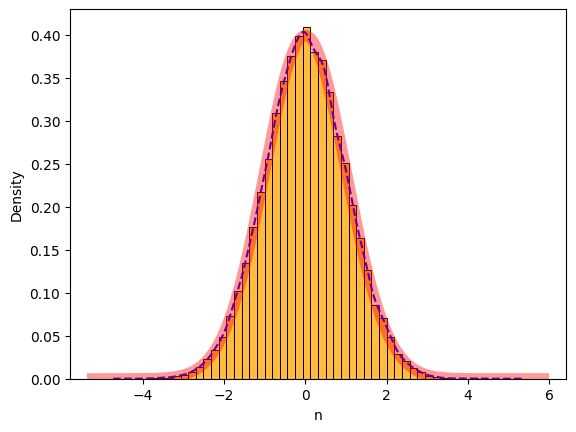

In [11]:
LIMIT = 50000

df = pd.DataFrame(numbers[:LIMIT], columns=["n"])
ax = sns.histplot(
    df,
    x="n",
    color="orange",
    stat="density",
    bins=50,
)
sns.kdeplot(df, x="n", color="blue", ax=ax, linestyle="--")

# This section draws the theoretical distribution curve;
# extract the endpoints for the x-axis:
x0, x1 = ax.get_xlim()
# 1000 evenly spaced points on the x-axis:
x_pdf = np.linspace(x0, x1, 1000)
# get output of normal PDF for each x-axis point:
y_pdf = sp.stats.norm.pdf(x_pdf)

ax.plot(x_pdf, y_pdf, "red", lw=8, alpha=0.4)

plt.show()

## Mean and standard deviation

We already have concrete instruments at our disposal to model the properties of the list of values in a sample. You know, for instance, what a mean (μ) and a standard deviation (σ) are, two very common **descriptive statistics**. We can calculate them for the sample that we just drew:

In [12]:
print(f"Mean: {numbers.mean()}")
print(f"Standard Deviation: {numbers.std()}")

Mean: -0.004232930278922841
Standard Deviation: 1.0037033025842674


The mean is very close to zero and the standard deviation close to 1. Where do these numbers come from? They come from the default values for the parameters of `rng.normal()` (which we left unspecified above, but which are 0 and 1 respectively). We can fill in other values to obtain a sample from a population that is parametrized using these other parameters:

Mean: 9.97036948804754
Standard Deviation: 7.025923118089873


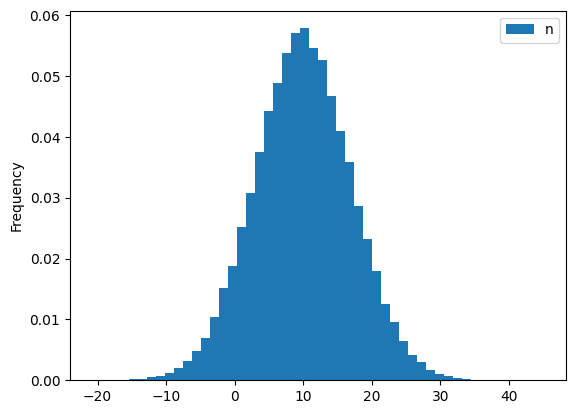

In [15]:
μ = 10
σ = 7
rng = np.random.default_rng(seed=42)

numbers = rng.normal(loc=μ, scale=σ, size=100000)
pd.DataFrame(numbers, columns=["n"]).plot.hist(bins=50, density=True)

print(f"Mean: {numbers.mean()}")
print(f"Standard Deviation: {numbers.std()}")
plt.show()

You can see how these parameters influence the location of the peak in the distribution and the spread around it: the mean value is now close to 10 (the original μ that we specified in the function call) and the standard deviation (~7) approximates the value of σ. (Observe how the **spread around the mean** is much larger than in the previous example!) Interestingly, these parameters are **completely independent** from one another in the case of the normal (this isn't true for many other distributions): you can have a really high mean with a really small standard deviation or the other way round. *A normal distribution only needs μ and σ to be fully defined or specified*. In mathematical notation, we can express a normal as:

> $\Huge x \sim \mathcal{N} (\mu, \sigma^2)$

You can read this as follows: "$x$ is a variable that is sampled from a population that is normally distributed with mean $\mu$ and standard deviation $\sigma$".

(In case you are wondering why the sigma is squared in the maths notation, the mathematical parameters for the normal distribution are actually the mean and *variance* which you might remember from earlier is the square of the standard deviation, even though standard deviation is much more commonly used as a *coding* parameter.)

#### Exercise

> Draw a couple of reasonably sized samples from a random distribution with a stable mean of 10, but vary the standard deviation ($1 \leq \sigma \leq 10$). Draw the density and inspect the range of the values on the y-axis, in particular the density for the mean. Does this range change at all?

In [11]:
# code here

## Recognizing a normal when you see one

Above we drew relatively large samples from an "ideal population" that perfectly follows a normal distribution and led to beautifully shaped bell curves. This use of the normal distribution is very common in statistics and has many applications, but it also remains rather theoretical and abstract. Often, you'll work with real-life samples, that might be much smaller. Such data might also display "normal" trends, but in a much messier way. 

Let us look two sets of real-life measurements. For this, we use our Spanish authors metadata, that we can load as follows:

In [17]:
span_auth = pd.read_csv("../../datasets/correlaciones/sp-authors.tsv", sep="\t")
span_auth

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,"4,5"
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,"1,2",0,0,77,5.5
...,...,...,...,...,...,...,...,...,...,...,...
128,129,Rafael Sánchez Mazas,Mazas,1894,1966,male,4,1,1,72,0
129,130,Ramón del Valle-Inclán,Valle,1866,1936,male,162,13,16,70,5
130,131,Julio Camba,JCamba,1882,1962,male,1,0,7,80,4
131,132,Rubén Darío,Dario,1867,1916,male,50,2,3,49,6


We will focus on two columns here, that contain numeric information for these (already deceased) authors as integers: their life span (in years: `life-span`) and the number of `novels` which they produced (this number can be zero, since they might only have written other "works").


#### Exercise
> First, explore the data by drawing a histogram and density plot and **theorize** for yourself whether it would make sense to expect that these variables are normally distributed. Can we expect that these numbers have a (single) peak? Can we expect a stable and symmetric dispersion around that peak? These are crucial assumptions that must be met before you can even start hypothezing that a variable shows a normal distribution.

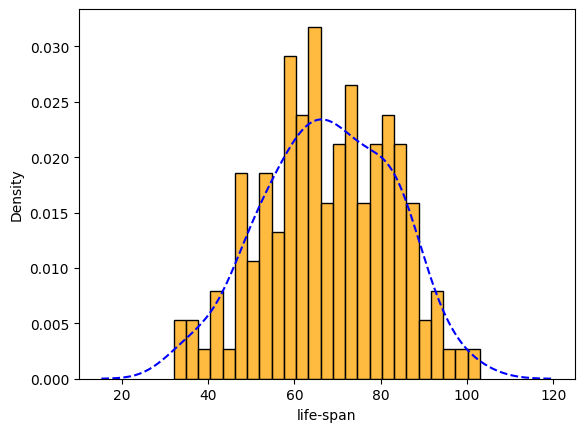

In [18]:
col = "life-span"
sns.histplot(
    span_auth,
    x=col,
    color="orange",
    stat="density",
    bins=25,
)
sns.kdeplot(span_auth, x=col, color="blue", linestyle="--")
plt.show()

#### Exercise

> Now do the same for the `novels` column

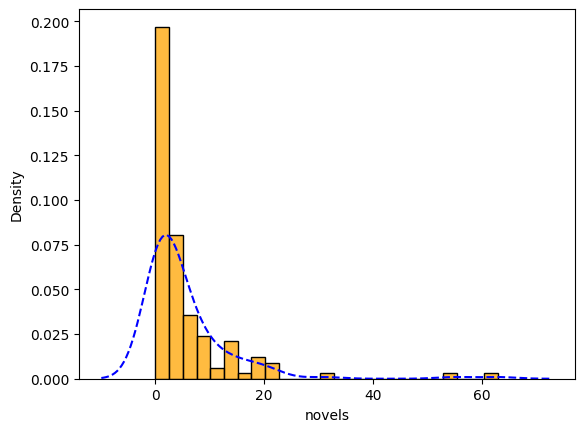

In [19]:
# code here
# If in doubt, cut, paste, and edit!
col = "novels"
sns.histplot(
    span_auth,
    x=col,
    color="orange",
    stat="density",
    bins=25,
)
sns.kdeplot(span_auth, x=col, color="blue", linestyle="--")
plt.show()

Clearly, both columns represent samples that were drawn from populations that follow rather different distributions. The life span show modest "signs of normality": we observe a clear peak with some symmetric spread around it. That makes sense: all authors share a similar body that will give up at a certain point (although there could be e.g. sex differences). (It is no coincidence that `life-span` is a more "physical" variable from biology, where normals are ubiquitous.) Some authors lived a bit longer, some a bit shorter, but there seems to be an average way in which they tend to deviate from the mean life span (and that is the same on both sides, although there's a "bump" to the right).

For the number of novels, we can also observe a peak, but the spread around it is definitely not symmetric and heavily leans towards the left. This makes sense too: whereas most authors produced a low number of novels, none of them produced a negative number (zero is a "hard floor" in this case). There are some, but not many, who wrote relatively more novels. Therefore, the probability curve is left-skewed. (This is in fact a typical "counts" variable, that we'll model with other distributions in future sessions, such as the Poisson distribution.) Let us focus on the `life-span` variable for now.

##### Exercise (Hard)

> Try to model the normality of `life-span` "manually": calculate the mean and standard deviation in `life-span` and draw samples from a theoretical population with these parameters using `rng.normal()`. Plot the density curve for the sample: do you get something with a similar bell shape as the real data?

In [ ]:
# code here

## QQ Plots

A common method for "eyeballing" data where we assume normality is a Q-Q or Quantile-Quantile plot (although in fact this method will work to compare any two distributions). If the observed data matches the theoretical distribution, then the points will lie along the line $y=x$. If the points are related, then they will lie along a straight line, but with a different slope. Once you get used to them, Q-Q plots provide a quicker and richer way of checking distributional assumptions than looking at a pile of summary statistics.

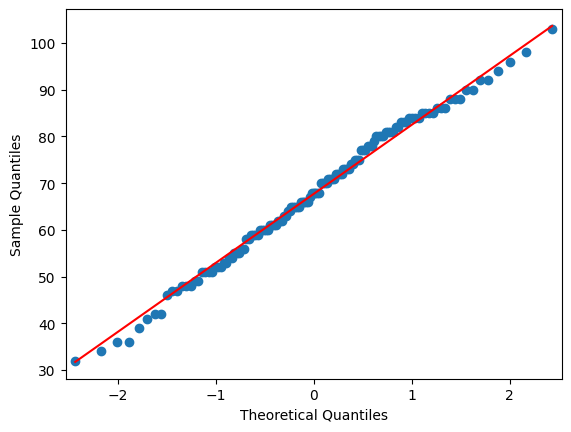

In [20]:
sm.qqplot(span_auth["life-span"], line="s")
plt.show()

Here, the `statsmodels` API automatically scales the theoretical line using the mean and standard deviation from our sample (remember that we calculated above that our mean is much high and spread is much greater than a standard normal $x \sim \mathcal{N}(0,1)$. If the data *were* standard normal it would fit the (unscaled) line $y=x$ which we can plot using the `line` option `45` (for 45 degrees)

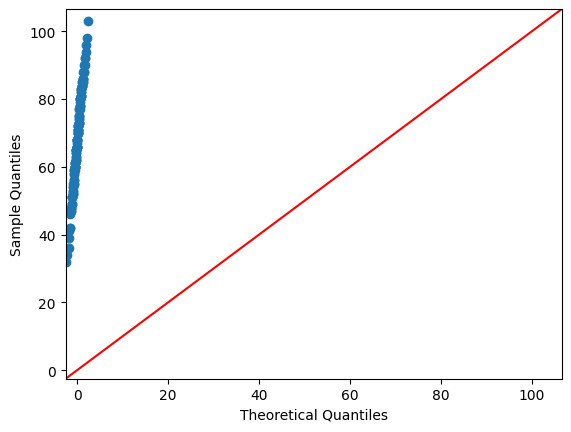

In [22]:
sm.qqplot(span_auth["life-span"], line="45")
plt.show()

Observe that our samples still lie in a straight line -- they are normally distributed, just with different parameters.

What happens when something doesn't fit? Let's look at the `novels` column...

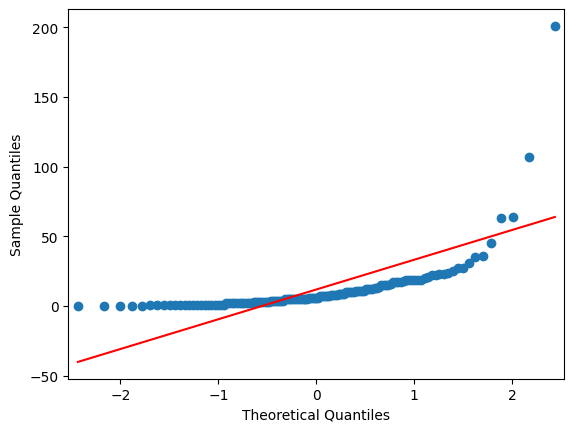

In [21]:
sm.qqplot(span_auth["works"], line="s")
plt.show()

No, these are not normally distributed (as we already knew)!

```
Version History

Current: v1.0.1

20/9/24: 1.0.0: first draft, BN
04/10/24: 1.0.1: typos + proofread, MK
```